## Preliminaries

#### Datetime

In [29]:
from datetime import datetime as dt 
now = dt.now()
print("Analysis on", now.strftime('%Y-%m-%d'), "at", now.strftime('%H:%M %p'))

Analysis on 2023-08-10 at 10:58 AM


#### Establish CWD

Identifying the current working directory from which the data is stored:

In [30]:
import os 
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

#### Import libraries

Import the following core libraries to support the analysis:

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## About the Data

#### About Dataset

This dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success. The problem is formulated as a three-category classification task, in which there is a strong imbalance towards one of the classes.

#### Data Attributes

| Column name                  | Description                                                                                          |
|-----------------------------|------------------------------------------------------------------------------------------------------|
| Marital status              | The marital status of the student. (Categorical)                                                    |
| Application mode            | The method of application used by the student. (Categorical)                                        |
| Application order           | The order in which the student applied. (Numerical)                                                 |
| Course                      | The course taken by the student. (Categorical)                                                      |
| Daytime/evening attendance  | Whether the student attends classes during the day or in the evening. (Categorical)                |
| Previous qualification      | The qualification obtained by the student before enrolling in higher education. (Categorical)        |
| Nationality                 | The nationality of the student. (Categorical)                                                        |
| Mother's qualification      | The qualification of the student's mother. (Categorical)                                             |
| Father's qualification      | The qualification of the student's father. (Categorical)                                             |
| Mother's occupation         | The occupation of the student's mother. (Categorical)                                                |
| Father's occupation         | The occupation of the student's father. (Categorical)                                                |
| Displaced                   | Whether the student is a displaced person. (Categorical)                                             |
| Educational special needs   | Whether the student has any special educational needs. (Categorical)                                 |
| Debtor                      | Whether the student is a debtor. (Categorical)                                                        |
| Tuition fees up to date     | Whether the student's tuition fees are up to date. (Categorical)                                     |
| Gender                      | The gender of the student. (Categorical)                                                              |
| Scholarship holder          | Whether the student is a scholarship holder. (Categorical)                                            |
| Age at enrollment           | The age of the student at the time of enrollment. (Numerical)                                         |
| International               | Whether the student is an international student. (Categorical)                                        |
| Curricular units 1st sem (credited)   | The number of curricular units credited by the student in the first semester. (Numerical)       |
| Curricular units 1st sem (enrolled)   | The number of curricular units enrolled by the student in the first semester. (Numerical)       |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical)     |
| Curricular units 1st sem (approved)    | The number of curricular units approved by the student in the first semester. (Numerical)      |

In this dataset the target variable 'Target' is formulated as a three category classification (dropout, enrolled, and graduate).

#### Import Dataset

In [32]:
df = pd.read_csv('data/student_success.csv')
df.head().transpose()

,0,1,2,3,4
Marital status,1,1,1,1,2
Application mode,8,6,1,8,12
Application order,5,1,5,2,1
Course,2,11,5,15,3
Daytime/evening attendance,1,1,1,1,0
Previous qualification,1,1,1,1,1
Nacionality,1,1,1,1,1
Mother's qualification,13,1,22,23,22
Father's qualification,10,3,27,27,28
Mother's occupation,6,4,10,6,10


View the dimensions of the data:

In [33]:
df.shape

(4424, 35)

The data frame has 4,424 rows and 35 columns.

## Data Preprocessing

##### Data Description

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nacionality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Father's qualification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


##### View Data Types

Renaming mispelled column from 'Nacionality' to 'Nationality':

In [35]:
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

All variables are numeric except for the target variable, which is categorical.

##### Missing Data

Use .isna() function to search for any missing data prior to analysis.

In [37]:
print(df.isna().sum())
print('Total Missing: ', df.isna().sum().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

There are no missing values.

##### Check for Duplicates

In [38]:
print('Total Duplicates: ', df.duplicated().sum())

Total Duplicates:  0


## Data Exploration

Next, I will take a look at the current distribution of the target variable with a frequency distribution table and corresponding bar chart. 

In [39]:
# Create data frame containing % of total column
freq_distribution = pd.DataFrame(df['Target'].value_counts())
freq_distribution['% of Total'] = round((freq_distribution['Target'] / df['Target'].value_counts().sum()) * 100, 2)
freq_distribution

,Target,% of Total
Graduate,2209,49.93
Dropout,1421,32.12
Enrolled,794,17.95


Approximately 50% of students graduated, 32% dropped out, and 18% are enrolled.

<Axes: xlabel='Target', ylabel='count'>

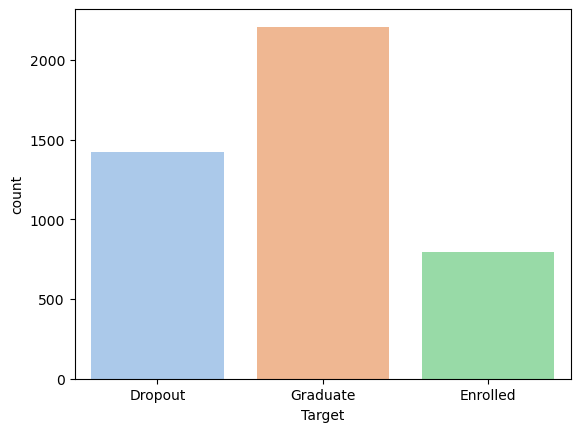

In [40]:
sns.countplot(df, x='Target', palette='pastel')